# **Cálculo Numérico:** Errores
09 de septiembre 2024 - Universidad Hospital Italiano de Buenos Aires

## Fuentes de error

Los cálculos numéricos, que involucran el uso de máquinas (análogas o digitales) presentan una serie de errores que provienen de diferentes fuentes:

- del modelo

- de los datos

- de truncamiento

- de representación de los números (punto flotante)

- $ \ldots$

### Error en el modelo y los datos

Imprecisiones en las mediciones o incertezas en los parámetros:

*Infortunadamente no tenemos control de los errores en los datos y el modelo de forma directa pero podemos usar métodos que pueden ser más robustos en la presencia de estos tipos de errores.*

### Error de truncamiento

Los errores surgen de la expansión de funciones con una función simple, por ejemplo, $sin(x) \approx x$ para $|x|\approx0$.

### Error de  representación de punto fotante

Los errores surgen de aproximar números reales con la representación  en precisión finita de números en el computador.

# Definiciones básicas

Errores absoluto y relativo: Es crucial cuantificar la precisión de una aproximación. Los errores absoluto y relativo son dos medidas comunes para hacerlo.

## **Error Absoluto**:
El error absoluto se define como la diferencia entre el valor verdadero (o de referencia) y el valor aproximado.

\begin{equation}
\text{Error Absoluto} = | \text{Valor Verdadero} - \text{Valor Aproximado} |
\end{equation}

***Ejemplo:*** Se realiza una medición y se obtiene un valor aproximado de $29.99$ *m*. Asumiendo que el valor exacto de dicha medición debería ser de $30.00$ *m*, ¿cuál es el error absoluto obtenido? Cuál sería el error absoluto si se disminuye un orden de magnitud las cantidades?

In [ ]:
v_verdadero = 30.0
v_aproximado = 29.9

resultado = abs(v_verdadero - v_aproximado)
print("{0:.4f}".format(resultado))

In [ ]:
# reduciendo un órden de magnitud las cantidades
v_verdadero = 3.0
v_aproximado = 2.9

resultado = abs(v_verdadero - v_aproximado)
print("{0:6.4f}".format(resultado))

Se observa que el valor del error absoluto es igual ($\approx 0.1$), independiente de la magnitud de las cantidades.

## **Error Relativo**:
El error relativo es el error absoluto dividido por el valor absoluto del valor verdadero. Se puede expresar como:

\begin{equation}
\text{Error Relativo} = \frac{\text{Error Absoluto}}{|\text{Valor Verdadero}|}
\end{equation}


Nota: para expresarlo en porcentaje, simplemente multiplicas el error relativo por 100.

***Ejemplo:*** Repetir el ejemplo anterior, pero calculando el error relativo porcentual.

In [ ]:
v_verdadero = 30.0
v_aproximado = 29.9

resultado = abs(v_verdadero - v_aproximado) / v_verdadero * 100
print("{0:.4f}%".format(resultado))

In [ ]:
# reduciendo un órden de magnitud las cantidades
v_verdadero = 3.0
v_aproximado = 2.9

resultado = abs(v_verdadero - v_aproximado) / v_verdadero * 100
print("{0:6.4f}%".format(resultado))

Se observa que los resultados son diferentes y es mayor cuando las cantidades medidas son menores.


# Ejercicio: Cálculo de Errores para la Función Exponencial

 Calcular los errores absoluto y relativo al evaluar una aproximación de la función exponencial para una lista de valores de `x`.

 1. Considera la siguiente lista de valores para x: [−1,−0.5,0,0.5,1,5,10].
 2. Para cada valor de `x`, calcula:
  * El valor exacto de `e^x ` utilizando `math.exp()`
  * Una aproximación de `e^x ` utilizando la serie de Taylor truncada hasta el término
`x^3`
\begin{equation}
e^x = \sum^\infty_{n=0} \frac{x^n}{n!} \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!}
\end{equation}

3. Una vez obtenidos el valor exacto y la aproximación para cada `x`, calcula el error absoluto y el error relativo.

4. En una plot, grafica x, valor_exacto , valor_aproximado. Si puedes coloca las legends para identificar

5. Guarda todo lo que creas necesario en un dataframe



Para x_valores = [-1, -0.5, 0, 0.5, 1] el resultao esperado es 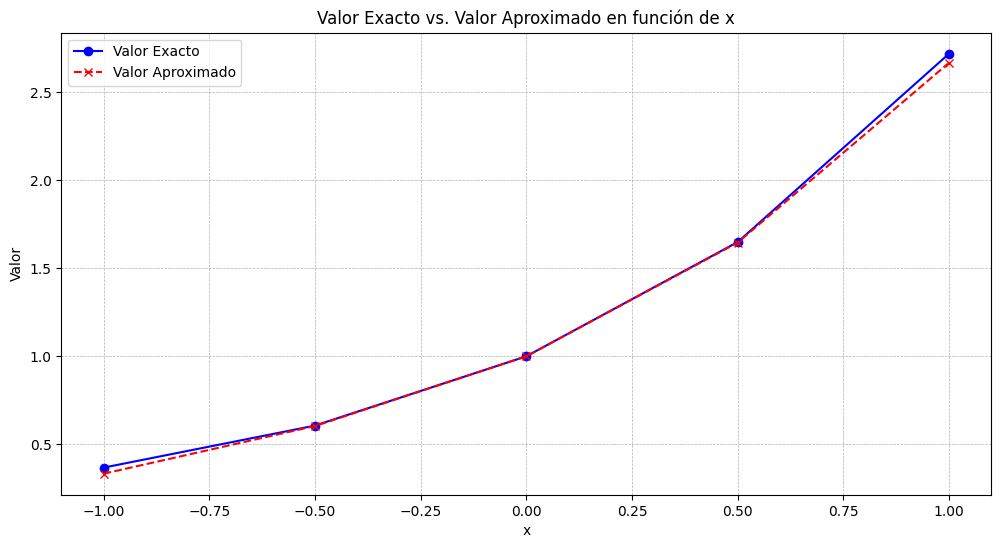 **¿qué sucede en x  5 y 10?**

## Resolución

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Cargo los valores por enunciado
x_val_1 = [-1,-0.5,0,0.5,1,5,10]

In [ ]:
# Hago la función de aproximación (para n=3):
def exp_aprox(x):
  return 1 + x + x**2/math.factorial(2) + x**3/math.factorial(3)

# Ejemplo:
print("e^2 = (con n = 3)", exp_aprox(2))

In [ ]:
def taylor_exp(x, n):
    resultado = 0
    # Calcular suma de los términos de la serie de Taylor
    for k in range(n + 1):
        resultado = resultado + x**k / math.factorial(k) # resultado += x**k / math.factorial(k)
    return resultado

# Ejemplo:
print("e^2 = (con n = 3)", taylor_exp(2, 3))

Nota: el código:

```python
exp_verdadero = []
for i in x_val_1:
    exp_verdadero.append(math.exp(i))
```

Puede escribirse utilizando listas por comprensión de la siguiente forma:

```python
exp_verdadero = [math.exp(i) for i in x_val_1]
```

In [ ]:
#Lista con valores verdaderos
exp_verdadero = [math.exp(i) for i in x_val_1]

#Lista con valores aproximados con serie de Taylor
exp_taylor = [exp_aprox(i) for i in x_val_1]

#Lista con errores absolutos
errores_abs = [abs(av-aa) for av,aa in zip(exp_verdadero,exp_taylor)]

#Lista con errores relativos
errores_rel = [ea/abs(av) for ea,av in zip(errores_abs,exp_verdadero)]

#Guardar datos en dataframe
datos = {'x':x_val_1,
         'e^x':exp_verdadero,
         'e^x_aproximado':exp_taylor,
         'error_absoluto':errores_abs,
         'error_relativo':errores_rel}

df = pd.DataFrame(datos)

df

## Gráfico

In [ ]:
df

In [ ]:
df[:5]

In [ ]:
#Graficar para x:[-1,1]
plt.figure(figsize=(10, 6))
plt.plot(df['x'][:5], df['e^x'][:5], label='Exponencial verdadera', marker='o')
plt.plot(df['x'][:5], df['e^x_aproximado'][:5], label='Exponencial aproximada', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponencial: Valor verdadero vs. Aproximación')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Graficar para x:[-1,10]
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['e^x'], label='Exponencial verdadera', marker='o')
plt.plot(df['x'], df['e^x_aproximado'], label='Exponencial aproximada', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponencial: Valor verdadero vs. Aproximación')
plt.legend()
plt.grid(True)
plt.show()

# ¿Error absoluto o relativo?

### **Depende del contexto** y del **tipo de problema** que estés abordando:

**Error absoluto:**

*   Evalua el tamaño de la desviación en unidades reales. Pequeñas diferencias pueden ser críticas (por ejemplo, en medidas físicas)
*   Valores a comparar tienen magnitudes similares.
*   Ejemplo de uso en problemas físicos (mediciones)

**Error relativo:**

*   El valor verdadero puede variar en orden de magnitud.
*   Cuando los valores a comparar tienen magnitudes diferentes.
*   Ejemplo de uso en ingeniería y procesamiento de señales


In [ ]:
# Ordenar por error absoluto (de mayor a menor)
df_error_absoluto = df.sort_values(by='error_absoluto', ascending=False)
df_error_absoluto = df_error_absoluto.style.background_gradient(cmap='Blues')
df_error_absoluto

In [ ]:
# Ordenar por error absoluto (de mayor a menor)
df_error_relativo = df.sort_values(by='error_relativo', ascending=False)
df_error_relativo = df_error_relativo.style.background_gradient(cmap='Blues')
df_error_relativo